In [159]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler

In [161]:
df = pd.read_csv("heart.csv")

In [163]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [167]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [170]:
X = df.drop('target', axis=1)
y = df['target']

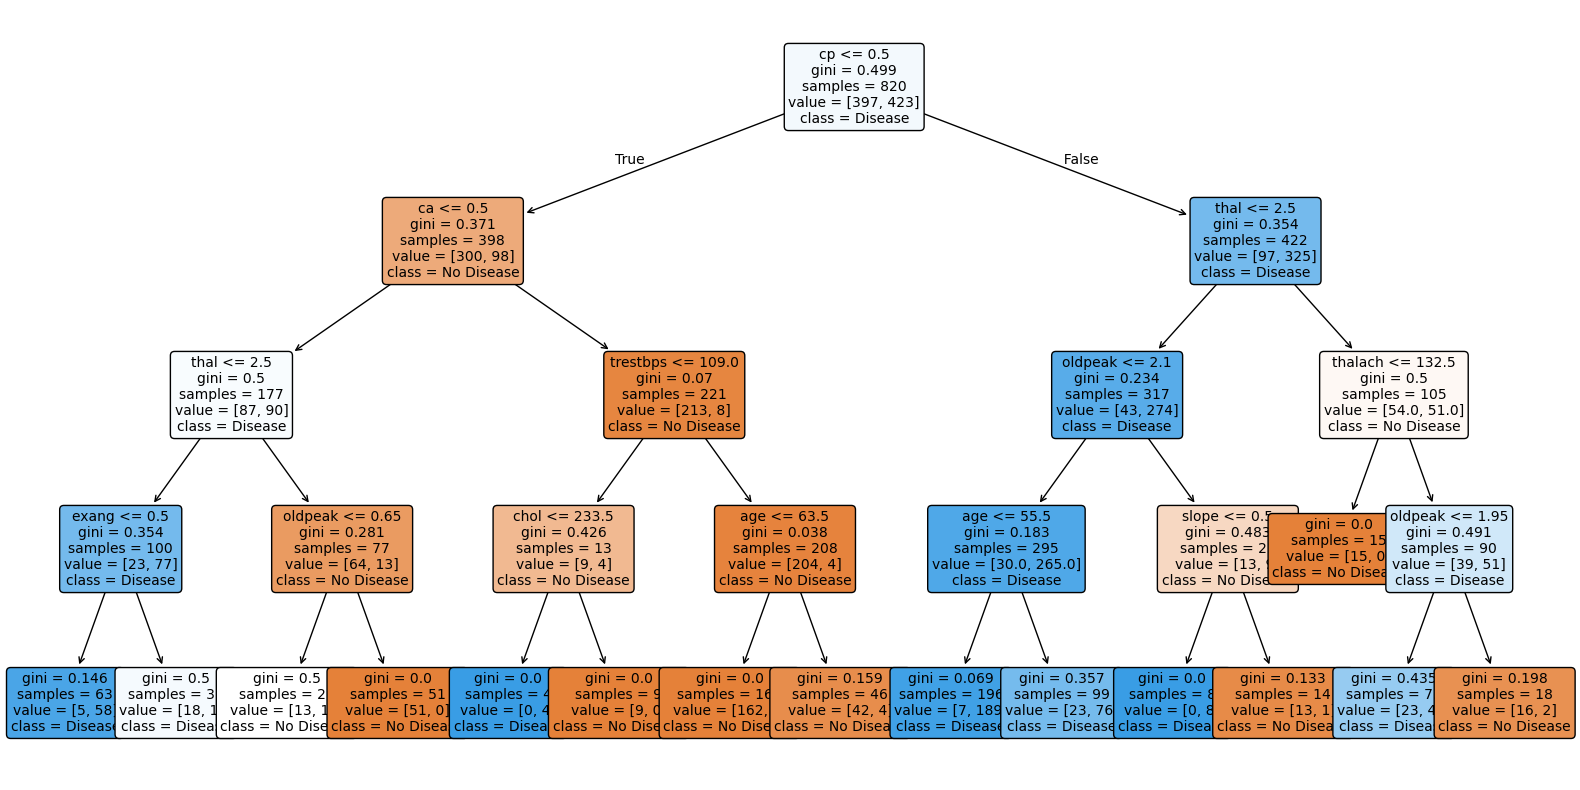

Test Accuracy: 0.80


In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=4, random_state=42)  
clf.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(
    clf, 
    feature_names=X.columns, 
    class_names=["No Disease", "Disease"], 
    filled=True, 
    rounded=True,
    fontsize=10
)
plt.show()

accuracy = clf.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")



Deep Tree (No max_depth):
Train Accuracy: 1.0
Test Accuracy: 0.9853658536585366

Shallow Tree (max_depth=4):
Train Accuracy: 0.8829268292682927
Test Accuracy: 0.8


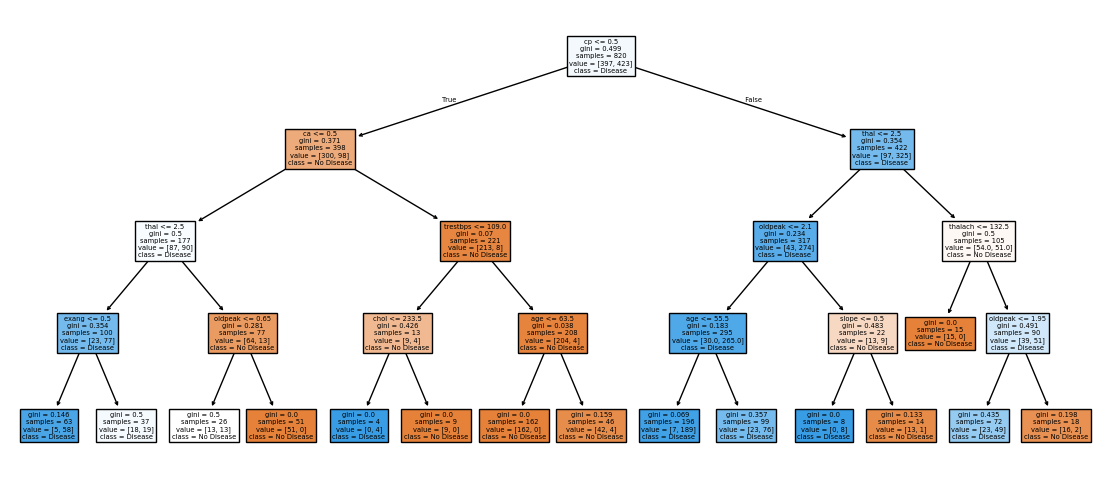

In [174]:
deep_tree = DecisionTreeClassifier(random_state=42)
deep_tree.fit(X_train, y_train)

train_acc_deep = accuracy_score(y_train, deep_tree.predict(X_train))
test_acc_deep = accuracy_score(y_test, deep_tree.predict(X_test))

print("\nDeep Tree (No max_depth):")
print("Train Accuracy:", train_acc_deep)
print("Test Accuracy:", test_acc_deep)

shallow_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
shallow_tree.fit(X_train, y_train)

train_acc_shallow = accuracy_score(y_train, shallow_tree.predict(X_train))
test_acc_shallow = accuracy_score(y_test, shallow_tree.predict(X_test))

print("\nShallow Tree (max_depth=4):")
print("Train Accuracy:", train_acc_shallow)
print("Test Accuracy:", test_acc_shallow)

plt.figure(figsize=(14, 6))
plot_tree(shallow_tree, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.show()

In [175]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, lr_preds)

print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(f"Logistic Regression Accuracy: {lr_acc:.4f}")


Random Forest Accuracy: 0.9854
Logistic Regression Accuracy: 0.7951


C:\Users\HP\AppData\Local\Temp\ipykernel_7208\2427553366.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


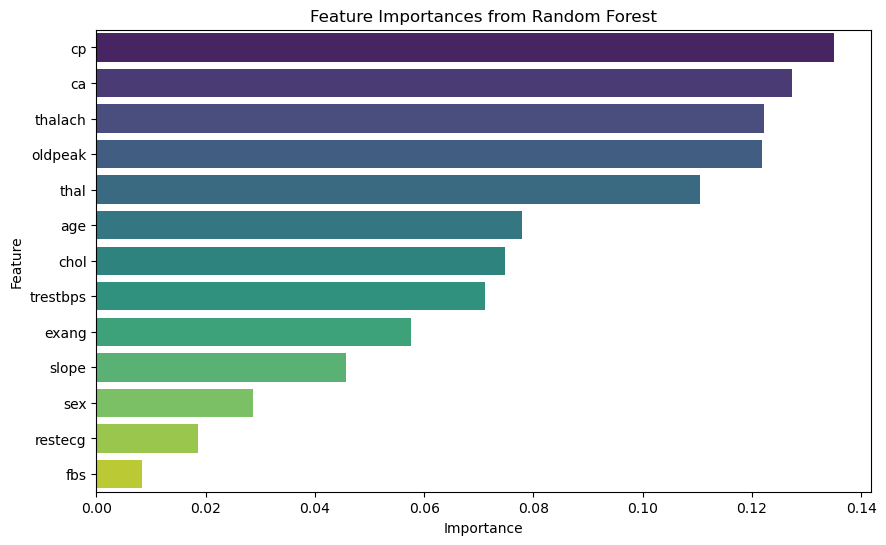

cp: importance score 0.1351 — Higher score means it contributes more to predicting heart disease.
ca: importance score 0.1273 — Higher score means it contributes more to predicting heart disease.
thalach: importance score 0.1222 — Higher score means it contributes more to predicting heart disease.
oldpeak: importance score 0.1219 — Higher score means it contributes more to predicting heart disease.
thal: importance score 0.1105 — Higher score means it contributes more to predicting heart disease.
age: importance score 0.0779 — Higher score means it contributes more to predicting heart disease.
chol: importance score 0.0748 — Higher score means it contributes more to predicting heart disease.
trestbps: importance score 0.0712 — Higher score means it contributes more to predicting heart disease.
exang: importance score 0.0576 — Higher score means it contributes more to predicting heart disease.
slope: importance score 0.0458 — Higher score means it contributes more to predicting heart di

In [176]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Feature Importances from Random Forest")
plt.show()

for feature, score in importance_df.values:
    print(f"{feature}: importance score {score:.4f} — "
          f"Higher score means it contributes more to predicting heart disease.")



In [177]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression(max_iter=1000)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X_scaled, y, cv=cv, scoring="accuracy")

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())


Cross-validation scores: [0.83414634 0.86829268 0.82926829 0.83902439 0.85853659]
Mean accuracy: 0.8458536585365855
Standard deviation: 0.014987601459255834
